In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import distributions
from scipy.optimize import minimize

In [2]:
#generate the signal, model mock data. metallic rods

n_rods = 100

linear_density = 2.5
lengths = np.random.uniform(1,10,size=n_rods)
masses = linear_density*lengths  #just a number times the np array


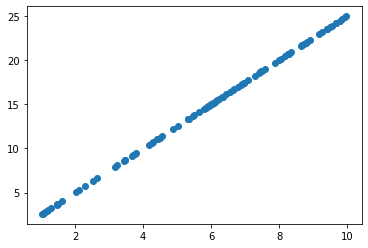

In [3]:
plt.scatter(lengths, masses);

In [4]:
data = np.column_stack([lengths, masses])

In [5]:
data.shape #rows, columns

(100, 2)

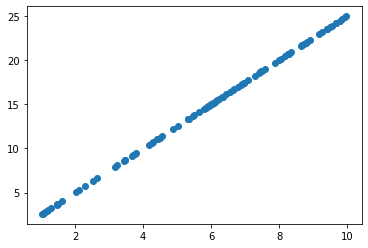

In [6]:
plt.scatter(data[:,0], data[:,1])

In [7]:
#building a function to return our function y value
def build_linear_model(slope, intercept):
    def linear_model(length):
        return length * slope + intercept
    return linear_model

In [8]:
f = build_linear_model(1,0)
f(1)

1

In [9]:
xmin = min(lengths)
xmax = max(lengths)
x_grid = np.linspace(xmin, xmax, 50)

3

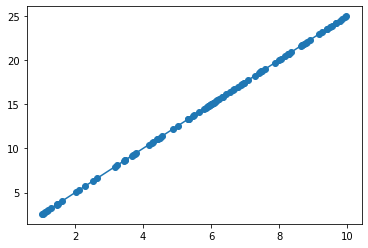

In [10]:
model = build_linear_model(linear_density, 0)
plt.scatter(lengths, masses)
plt.plot(x_grid, model(x_grid));3

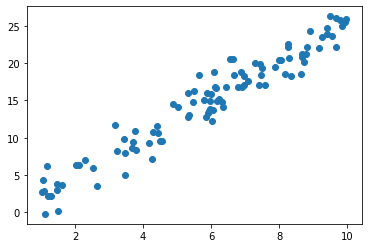

In [11]:
#introduce gaussian noise
sigma = 2.
masses += np.random.normal(scale=sigma, size=len(masses))

plt.scatter(lengths, masses)
#same data set, but added gaussian noise

In [12]:
# pretend no longer know slope, y intercept 
def lnlikelihood(model_params, xs=lengths):
    slope, intercept, sigma_noise = model_params
    
    linear_model = build_linear_model(slope, intercept)
    residuals = masses - linear_model(xs)
    
    lnlike = np.sum(distributions.norm.logpdf(residuals, loc=0, scale=sigma_noise))
    return lnlike

In [13]:
param0 = [2, 0 , .2]

sol = minimize(lambda params: -lnlikelihood(params), param0, method='powell')


In [14]:
best_fit_params = sol.x

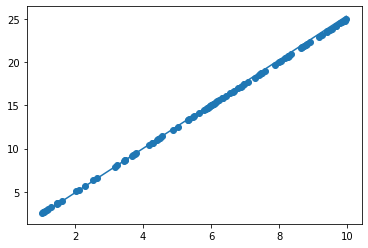

In [17]:
best_fit_model = build_linear_model(best_fit_params[0], best_fit_params[1])

plt.scatter(data[:,0], data[:,1])
plt.plot(x_grid, best_fit_model(x_grid));

In [16]:
best_fit_params #could do more n_rods to get closer to 2.5

array([ 2.55780965, -0.20810447,  1.70739168])